###EC9630 Machine Learning - Laboratory 04

###Task: SUPPORT VECTOR MACHINES

###Name: Lakshan W.G.

###Reg No: 2020/E/079

###Date: 23 Aug 2024

###Time: 08.00 a.m

**Task 01:**

### Include libraries and Read the data as a CSV file.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Display inline matplotlib plots
%matplotlib inline

# Load the Adult dataset from the UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain',
           'capital-loss', 'hours-per-week', 'native-country', 'income']

# Reading the dataset
df = pd.read_csv(url, names=columns, sep=',\s', na_values=["?"], engine='python')

# Display the first few rows of the dataset
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


###Exploratory Data Analysis (EDA) and Preprocessing

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

# Display the processed data
df.head()


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,50,83311,13,0,0,13,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,38,215646,9,0,0,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,53,234721,7,0,0,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,28,338409,13,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


###Divide the dataset into Input (X) and Target (y).

In [ ]:
# Separate the input features and target variable
X = df.drop('income_>50K', axis=1)
y = df['income_>50K']

###Create the training, validation and test datasets separately. (Use 70%, 20%, 10% respectively)

In [ ]:
# Split the data into training (70%), validation (20%), and test (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42, stratify=y_temp)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

###Implementing and Training the SVM Classifier

In [ ]:
# Initialize the SVM classifier with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = svm_model.predict(X_val)

# Evaluate the performance on the validation set
print("Validation Accuracy:", accuracy_score(y_val, y_pred_val))
print("Classification Report:\n", classification_report(y_val, y_pred_val))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val))


Validation Accuracy: 0.8495546024414384
Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.93      0.90      4553
        True       0.75      0.60      0.67      1509

    accuracy                           0.85      6062
   macro avg       0.81      0.77      0.78      6062
weighted avg       0.84      0.85      0.84      6062

Confusion Matrix:
 [[4244  309]
 [ 603  906]]


###Visualize the decision boundary and support vectors

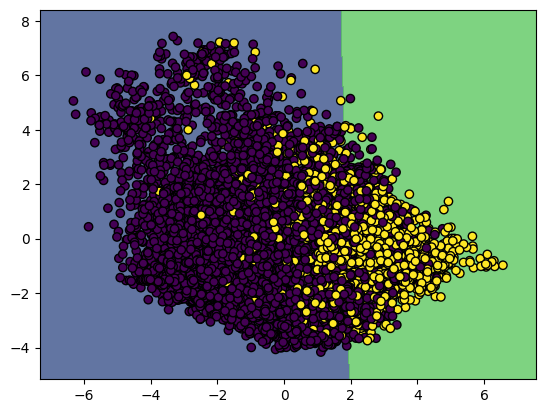

In [ ]:
# Since the dataset is high-dimensional, visualizing the decision boundary directly is challenging.
# For visualization purposes, let's reduce to 2D using PCA (only for illustration, not part of the standard pipeline)

from sklearn.decomposition import PCA

# Reduce dimensionality to 2D
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)

# Train the SVM model again on the reduced dataset
svm_model_2D = SVC(kernel='linear', random_state=42)
svm_model_2D.fit(X_train_2D, y_train)

# Plot decision boundary
def plot_decision_boundary(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.show()

# Visualize the decision boundary
plot_decision_boundary(X_train_2D, y_train, svm_model_2D)


###Explore different kernel functions (e.g., linear, polynomial, radial basis function) available in scikit-learn and compare the performance of SVMs with different kernels.

In [ ]:
# Explore SVM with different kernels: linear, polynomial, RBF
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    print(f"\nKernel: {kernel}")
    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(X_train, y_train)
    y_pred_val = svm_model.predict(X_val)
    print("Validation Accuracy:", accuracy_score(y_val, y_pred_val))
    print("Classification Report:\n", classification_report(y_val, y_pred_val))
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val))



Kernel: linear
Validation Accuracy: 0.8495546024414384
Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.93      0.90      4553
        True       0.75      0.60      0.67      1509

    accuracy                           0.85      6062
   macro avg       0.81      0.77      0.78      6062
weighted avg       0.84      0.85      0.84      6062

Confusion Matrix:
 [[4244  309]
 [ 603  906]]

Kernel: poly
Validation Accuracy: 0.824975255691191
Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.94      0.89      4553
        True       0.73      0.46      0.57      1509

    accuracy                           0.82      6062
   macro avg       0.79      0.70      0.73      6062
weighted avg       0.82      0.82      0.81      6062

Confusion Matrix:
 [[4300  253]
 [ 808  701]]

Kernel: rbf
Validation Accuracy: 0.8459254371494557
Classification Report:
               precis

###Applying k-fold cross validation and Stratified k-fold cross-validation.

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.svm import SVC

# Define the SVM models with different kernels
models = {
    'linear': SVC(kernel='linear', random_state=42),
    'poly': SVC(kernel='poly', degree=3, random_state=42),
    'rbf': SVC(kernel='rbf', random_state=42)
}

# Number of folds for cross-validation
k = 5

# Initialize cross-validators with shuffle enabled and fixed random seed for reproducibility
kf = KFold(n_splits=k, shuffle=True, random_state=42)
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Function to perform cross-validation and print results
def perform_cross_validation(cv, cv_name):
    print(f"{cv_name} Cross-Validation Results:")
    for name, model in models.items():
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
        print(f"{name} kernel: Mean Accuracy = {np.mean(scores):.2f} ± {np.std(scores):.2f}")
    print()

# Perform K-Fold Cross-Validation
perform_cross_validation(kf, "K-Fold")

# Perform Stratified K-Fold Cross-Validation
perform_cross_validation(skf, "Stratified K-Fold")


K-Fold Cross-Validation Results:
linear kernel: Mean Accuracy = 0.85 ± 0.00
poly kernel: Mean Accuracy = 0.82 ± 0.00
rbf kernel: Mean Accuracy = 0.84 ± 0.00

Stratified K-Fold Cross-Validation Results:
linear kernel: Mean Accuracy = 0.85 ± 0.00
poly kernel: Mean Accuracy = 0.82 ± 0.00
rbf kernel: Mean Accuracy = 0.84 ± 0.00



**Task 02:**

###Implement an SVM for regression (SVR).

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.svm import SVR

# Initialize the SVR model with a linear kernel
svr_model = SVR(kernel='linear')

# Train the model on the training data
svr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svr = svr_model.predict(X_test)

# Calculate regression evaluation metrics
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE) for SVR: {mae_svr:.2f}")
print(f"Mean Squared Error (MSE) for SVR: {mse_svr:.2f}")
print(f"Root Mean Squared Error (RMSE) for SVR: {rmse_svr:.2f}")



Mean Absolute Error (MAE) for SVR: 0.27
Mean Squared Error (MSE) for SVR: 0.15
Root Mean Squared Error (RMSE) for SVR: 0.39


###Compare the SVR results with previous Linear Regression models results.

`****** Results of Linear Regression lab session ******`

`Mean Absolute Error (MAE): 188.43386949236697`

`Mean Squared Error (MSE): 55620.04153987601`

`Root Mean Squared Error (RMSE): 235.83901615270534`



`****** Results of SVM lab session ******`

`Mean Absolute Error (MAE) for SVR: 0.27`

`Mean Squared Error (MSE) for SVR: 0.15`

`Root Mean Squared Error (RMSE) for SVR: 0.39`

**The mentioned numbers indicate the superiority of the SVR model in comparison with the Linear Regression model when it comes to this data set. The SVR model error values are much lower, thus showing that it is the model that can catch the underlying patterns of the data more accurately.**